<a href="https://colab.research.google.com/github/ajaysinggh/data-science-projects/blob/master/Big_Data_Mart_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Big Data Mart Sales Analysis

# IT IS REGRESSION PROBLEM AS HAS TO PREDICT THE SALES OF THE MARTS

In [ ]:
# IMPORTING THE LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from time import time

In [ ]:
# IMPORTING THE DATASET 
train = pd.read_csv("C:\\Users\\AJAY SINGH\\BM_TRAIN.csv")                      # TRAIN SET
test = pd.read_csv("C:\\Users\\AJAY SINGH\\BM_TEST.csv")                        # TEST SET
print("shape of the training set:\n",train.shape)
print("__"*40)
print("shape of the test set :\n",test.shape)

shape of the training set:
 (8523, 12)
________________________________________________________________________________
shape of the test set :
 (5681, 11)


In [ ]:
print("5 rows of the training set:\n",train.head())
print("__"*40)
print("5 rows of the test set:\n",test.head())

5 rows of the training set:
   Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999  

In [ ]:
# INFORMATION FOR BOTH TRAINING AND TESTING SET
print("Info of the training set :\n",train.info())
print("__"*40)
print("Info of the testing set :\n",test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB
Info of the training set :
 None
________________________________________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
Item_

In [ ]:
# CONCATENATING THE BOTH THE DATA SETS
sales_df = pd.concat([train,test] ,ignore_index=True)
# TOP 5 ROWS OF THE SALES DATA
print(sales_df.head())
print("__"*40)
print(train.shape,test.shape,sales_df.shape)
print("__"*40)
print("5 rows of the sales_df set:\n",sales_df.head())

  Item_Fat_Content Item_Identifier  Item_MRP  Item_Outlet_Sales  \
0          Low Fat           FDA15  249.8092          3735.1380   
1          Regular           DRC01   48.2692           443.4228   
2          Low Fat           FDN15  141.6180          2097.2700   
3          Regular           FDX07  182.0950           732.3800   
4          Low Fat           NCD19   53.8614           994.7052   

               Item_Type  Item_Visibility  Item_Weight  \
0                  Dairy         0.016047         9.30   
1            Soft Drinks         0.019278         5.92   
2                   Meat         0.016760        17.50   
3  Fruits and Vegetables         0.000000        19.20   
4              Household         0.000000         8.93   

   Outlet_Establishment_Year Outlet_Identifier Outlet_Location_Type  \
0                       1999            OUT049               Tier 1   
1                       2009            OUT018               Tier 3   
2                       1999       

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                  2439
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
dtype: int64


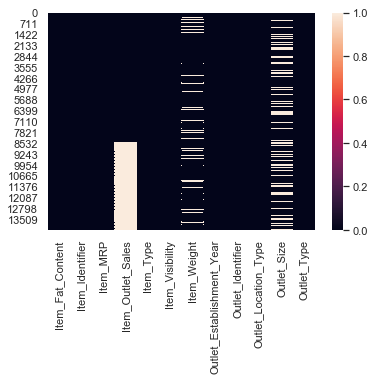

In [ ]:
# CHECKING FOR THE NULL VALUES THROUGH HEATMAP
print(sales_df.isnull().sum())
sns.set(style='darkgrid')
sns.heatmap(sales_df.isnull())
plt.show()

In [ ]:
# TARGET CONTAINS NAN VALUES BUT IT'S IN THE TEST SET. TWO FEATURES CONTAINS NAN VALUES IN THE DATASET

Skewness of the Item_Outlet_Sales :
 1.1775306028542798


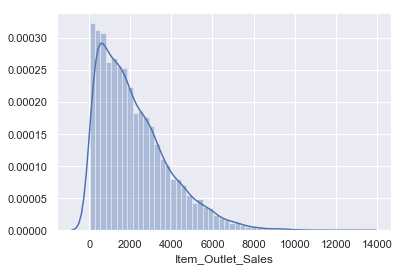

In [ ]:
# CHECKING THE DISTPLOT OF THE TARGET VARIABLE AND CHECKING THE SKEWNESS OF THE DATA
sns.distplot(train['Item_Outlet_Sales'])
print("Skewness of the Item_Outlet_Sales :\n",train['Item_Outlet_Sales'].skew())

In [ ]:
train['Item_Outlet_Sales'].describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

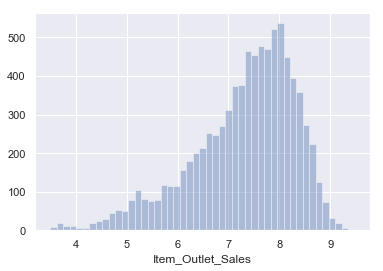

In [ ]:
# Target variable is right skewed so using the log to transform the right skewed data
train['Item_Outlet_Sales'] = np.log(train['Item_Outlet_Sales'])
sns.distplot(train['Item_Outlet_Sales'],kde=False)

In [ ]:
# IT IS ALMOST NORMALIZED BUT IT MAY CONTAINS SOME OUTLIERS 

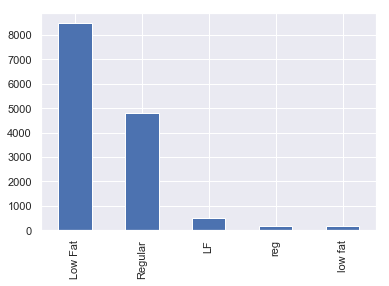

In [ ]:
# CHECKING THE VALUE COUNT OF THE Item_Fat_Content FEATURE
sales_df['Item_Fat_Content'].value_counts().plot.bar()

In [ ]:
# LF AND lOW FAT AND reg CAN ME ADDED WITH LOW FAT AND WITH REGULAR 
def replace_value(string):
    if string=='low fat' or string =='LF' or string=='Low Fat':
        return 0
    else:
        return 1
    
sales_df['Item_Fat_Content']=sales_df['Item_Fat_Content'].apply(replace_value)

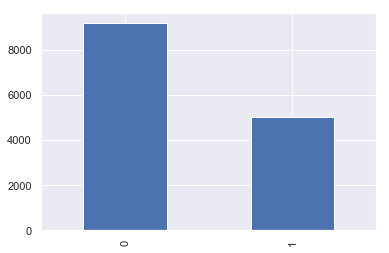

In [ ]:
# CHECKING THE VALUE COUNT OF THE Item_Fat_Content FEATURE
sales_df['Item_Fat_Content'].value_counts().plot.bar()

In [ ]:
# FROM THE BAR PLOT IT IS CLEAR THAT LOW FAT CONTENT HAS MORE SALE THAN REGULAR FAT CONTENT

In [ ]:
# FILLING THE MISSING VALUE OF THE Item_Weight FEATURE OF THE DATASET
sales_df['Item_Weight'].fillna(sales_df['Item_Weight'].mean(),inplace=True)
sales_df['Item_Outlet_Sales'].fillna(sales_df['Item_Outlet_Sales'].mean(),inplace=True)

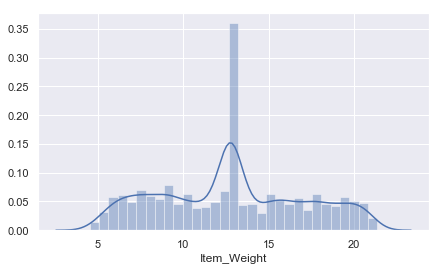

In [ ]:
# CHECKING THE NORMALITY  IN THE FEATURE Item_Weight 
plt.figure(figsize=(7,4))
sns.distplot(sales_df['Item_Weight'])

In [ ]:
# REMOVING THE SKEWNESS OF THE FEATURE
sales_df['Item_Weight'] = np.log(sales_df['Item_Weight'])

In [ ]:
sales_df.groupby("Item_Fat_Content")['Item_Outlet_Sales'].sum()

Item_Fat_Content
0    1.990506e+07
1    1.107797e+07
Name: Item_Outlet_Sales, dtype: float64

In [ ]:
sales_df.groupby("Item_Fat_Content")['Item_MRP'].mean()

Item_Fat_Content
0    141.189424
1    140.667431
Name: Item_MRP, dtype: float64

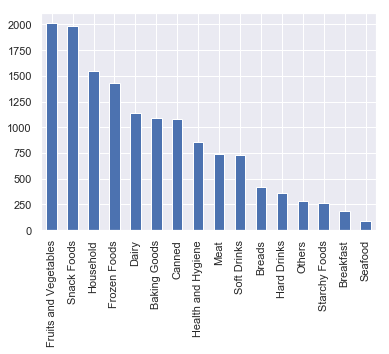

In [ ]:
sales_df['Item_Type'].value_counts().plot.bar()

In [ ]:
sales_df['Outlet_Size'].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [ ]:
# FILLING THE Outlet_Size FEATURE MISSING VALUE BY MODE
sales_df['Outlet_Size'].fillna(sales_df['Outlet_Size'].mode()[0],inplace=True)

REMOVING THE UNWANTED FEATURES FROM THE DATA

In [ ]:
sales_df.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'],axis=1,inplace=True)

In [ ]:
# DIVIDING THE CATEGORICAL DATA FROM THE DATASET
categorial_features = sales_df.select_dtypes(include=[np.object])
categorial_features.head(5)

,Item_Type,Outlet_Location_Type,Outlet_Size,Outlet_Type
0,Dairy,Tier 1,Medium,Supermarket Type1
1,Soft Drinks,Tier 3,Medium,Supermarket Type2
2,Meat,Tier 1,Medium,Supermarket Type1
3,Fruits and Vegetables,Tier 3,Medium,Grocery Store
4,Household,Tier 3,High,Supermarket Type1


In [ ]:
# NUMERICAL DATA FROM THE DATASET
numerical_features = sales_df.select_dtypes(include=[np.number])
numerical_features.head(5)

,Item_Fat_Content,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight
0,0,249.8092,3735.1380,0.016047,2.230014
1,1,48.2692,443.4228,0.019278,1.778336
2,0,141.6180,2097.2700,0.016760,2.862201
3,1,182.0950,732.3800,0.000000,2.954910
4,0,53.8614,994.7052,0.000000,2.189416


In [ ]:
# Check the skew of all numerical features and removing it through BOX COX TRANSFORM
from scipy.stats import skew
# numerical data skewness
skewed_feats = numerical_features.apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))


Skew in numerical features: 

There are 5 skewed numerical features to Box Cox transform


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
cols_train = list(numerical_features.columns)
index_train = numerical_features.index.tolist()

In [ ]:
numerical_features_names = numerical_features.columns
numerical_features_index = numerical_features.index

In [ ]:
from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.5
for feat in skewed_features:
    #all_data[feat] += 1
    numerical_features[feat] = boxcox1p(numerical_features[feat], lam)

In [ ]:
#Check values in numerical columns after minmax scaling
numerical_features.head(5)

,Item_Fat_Content,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight
0,0.000000,29.673914,120.247912,0.015983,1.594448
1,0.828427,12.038404,40.162675,0.019186,1.333669
2,0.000000,21.884556,89.613754,0.016690,1.930497
3,0.828427,25.062520,52.161979,0.000000,1.977391
4,0.000000,12.813696,61.109594,0.000000,1.571787


In [ ]:
X = pd.concat([categorial_features, numerical_features], axis=1)

In [ ]:
# SUMMARY OF THE CONTINOUS FEATURES AND CATEGORICAL FEATURES
print('SUMMARY ',X.describe())
print('__'*30)
print("Summary",X.describe(include='O'))

SUMMARY         Item_Fat_Content      Item_MRP  Item_Outlet_Sales  Item_Visibility  \
count      14204.000000  14204.000000       14204.000000     14204.000000   
mean           0.292726     21.192858          86.923526         0.064314   
std            0.396011      5.487564          28.667404         0.049194   
min            0.000000      9.364858           9.711533         0.000000   
25%            0.000000     17.494820          74.657394         0.026855   
50%            0.000000     21.937168          91.429951         0.053310   
75%            0.828427     25.339027          91.429951         0.091925   
max            0.828427     30.734593         226.805287         0.305117   

        Item_Weight  
count  14204.000000  
mean       1.730106  
std        0.196487  
min        1.172523  
25%        1.594448  
50%        1.767698  
75%        1.884631  
max        2.030410  
____________________________________________________________
Summary                     Item_Type 

In [ ]:
corr = X.corr()
corr

,Item_Fat_Content,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight
Item_Fat_Content,1.000000,-0.003570,0.013570,0.044473,-0.030940
Item_MRP,-0.003570,1.000000,0.438908,-0.008928,0.026608
Item_Outlet_Sales,0.013570,0.438908,1.000000,-0.123512,0.006715
Item_Visibility,0.044473,-0.008928,-0.123512,1.000000,-0.003465
Item_Weight,-0.030940,0.026608,0.006715,-0.003465,1.000000


In [ ]:
corr_matrix = X.corr().abs()

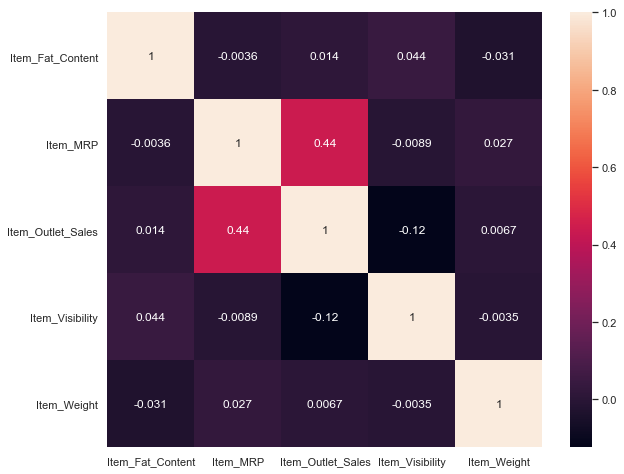

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True,square=True)

In [ ]:
# From the heatmap it is clear that feature 'Item_Visibility' is negatively correlated feature 'Item_Outlet_Sales'

In [ ]:
# ENCODING THE CATEGORICAL DATA INTO BINARY OF THE DATASET
from sklearn.preprocessing import LabelEncoder
cols = ("Outlet_Size", "Outlet_Type", "Item_Type" ,"Outlet_Location_Type" )
for c in cols:
    label = LabelEncoder()
    label.fit(list(X[c].values))
    X[c] = label.transform(list(X[c].values))

In [ ]:
print(X.head())
print("__"*40)
print(X.dtypes)

   Item_Type  Outlet_Location_Type  Outlet_Size  Outlet_Type  \
0          4                     0            1            1   
1         14                     2            1            2   
2         10                     0            1            1   
3          6                     2            1            0   
4          9                     2            0            1   

   Item_Fat_Content   Item_MRP  Item_Outlet_Sales  Item_Visibility  \
0          0.000000  29.673914         120.247912         0.015983   
1          0.828427  12.038404          40.162675         0.019186   
2          0.000000  21.884556          89.613754         0.016690   
3          0.828427  25.062520          52.161979         0.000000   
4          0.000000  12.813696          61.109594         0.000000   

   Item_Weight  
0     1.594448  
1     1.333669  
2     1.930497  
3     1.977391  
4     1.571787  
________________________________________________________________________________
Item_Type  

In [ ]:
x = X.drop('Item_Outlet_Sales',axis=1)
y = X['Item_Outlet_Sales']
# IMPORTING THE TRAIN_TEST_SPLIT
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33)

In [ ]:
# IMPORTING THE LIBRARY Measure Metrics 
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn import metrics
from sklearn.metrics import mean_squared_log_error

In [ ]:
def train_classifier(clf, x_train, y_train):
    # FITTING THE CLASSIFIER ON THE TRAINING DATA

    # CALCULATING THE TIME OF THE MODEL TO FIT THROUGH TIME FUNCTION
    start = time()
    clf.fit(x_train, y_train)
    end = time()

    # PRINT THE RESULT
    print("time of the training:",end-start)

In [ ]:
def predict_labels(clf, x_test, y_test):
    # MAKING PREDICTIONS AND CALCULATING THE MEASURE SCORE OF THE MODEL

   #CALCULATING THE TIME OF THE MODEL TO FIT THROUGH TIME FUNCTION
    start = time()
    y_pred = clf.predict(x_test)
    end = time()
    

    # PRINT THE RESULT
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('Root Mean Squared Log Error',np.sqrt(mean_squared_log_error( y_test, y_pred )))
    

In [ ]:
# MODELS
# IMPORTING THE LIBRARIES
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [ ]:
lg = LinearRegression()
dtc = DecisionTreeRegressor(criterion='mse',max_depth=3)
rf = RandomForestRegressor(n_estimators=10,n_jobs=-1,max_depth=3)
svr = SVR()

In [ ]:
train_classifier(lg,x_train,y_train)
predict_labels(lg,x_test,y_test)
print('coefficient :',lg.coef_)

time of the training: 0.012544631958007812
Mean Absolute Error: 18.427027898912897
Mean Squared Error: 542.3002759007462
Root Mean Squared Error: 23.287341537855845
Root Mean Squared Log Error 0.3350552674120177
coefficient : [ 1.33779006e-03 -7.08874026e+00 -5.83550938e+00  1.46063174e+01
  9.28509154e-01  2.28171013e+00 -2.54229564e+01 -1.61019923e+00]


In [ ]:
train_classifier(dtc,x_train,y_train)
predict_labels(dtc,x_test,y_test)

time of the training: 0.015108585357666016
Mean Absolute Error: 18.249837599741593
Mean Squared Error: 519.2504373603805
Root Mean Squared Error: 22.78706732689357
Root Mean Squared Log Error 0.32143316061697624


In [ ]:
train_classifier(rf,x_train,y_train)
predict_labels(rf,x_test,y_test)

time of the training: 0.12443685531616211
Mean Absolute Error: 18.10789077611667
Mean Squared Error: 512.015379978855
Root Mean Squared Error: 22.627756848146813
Root Mean Squared Log Error 0.3212995046620012


In [ ]:
train_classifier(svr,x_train,y_train)
predict_labels(svr,x_test,y_test)

time of the training: 7.018449783325195
Mean Absolute Error: 17.780713378538966
Mean Squared Error: 688.873292296802
Root Mean Squared Error: 26.246395796314623
Root Mean Squared Log Error 0.3825191445454825


In [ ]:
# Applying the GridSearchCV on the RandomForestModel
# Importing the Library
from sklearn.model_selection import GridSearchCV
params = ({'n_estimators':[20,30,40],'criterion':['mse','mae'],'max_depth':[3,4,5]})
grid_search = GridSearchCV(estimator=rf,param_grid=params,n_jobs=-1)

In [ ]:
grid_search.fit(x_train,y_train)
grid_search.predict(x_test)

array([ 99.07863492,  62.18542161,  56.76257975, ...,  86.61189131,
       110.1446851 ,  97.10875112])

In [ ]:
print("Best parameter of the model :",grid_search.best_params_)

Best parameter of the model : {'criterion': 'mse', 'max_depth': 5, 'n_estimators': 20}


In [ ]:
# So these are the best parameters which can be applied on Random Forest Model for getting the accuracy 

In [ ]:
# Saving the Random Forest Model
import pickle
filehandler = open("Project_29.obj","wb")
# saving the model in pickel string
saved_rf_model = pickle.dump(rf,filehandler)
filehandler.close()